# Assignment 3: Bootstrap, confidence intervals & standard errors

## Learning Outcomes:
In this homework we will look at Estimates, Bootstrap, Confidence intervals, and Standard error.
## Dataset 
The data set run10sample.csv contains data from random sample of 25 runner of the 16923 competitor in the 2012 Cherry blossom run (cherryblossom.org). The variables in the file are: 

- Place:  Finishing position. Separate positions are provided for each gender.
- time: The total run time (in min) 
- Pace: The listed pace (/mile) for each runner.
- Age: Age.
- Gender: Gender.
- Location: Hometown city. 
- State: Hometown state 
- divPlace: Age Division place, also broken up by gender.
- divTot: Total number of people in the division (again, also split by gender).

The data set run10.csv contains the data from all 16923 competitors, so you can also analyze the whole population. 

## Preliminaries
Set up the environment by importing pandas, numpy, scipy, and matplotlib. 

In [91]:
import pandas as pd
import numpy as np
import scipy as ss
import matplotlib.pyplot as plt 
import seaborn as sns

On some installations, you may still have to configure your notebook such that plots are shown inline (see Assignment 2). 

In [92]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

## Task 1: Analyzing a sample from the  population (12pt)
In this task you will use the sample of runners that you got. 
### Question 1 (4pt)
What was the mean finishing time in the random sample?

In [93]:
df1=pd.read_csv('run10sample.csv')
t1=df1.time.mean()
t1

98.1504

### Question 2 (4pt)
What is the number of men and women in your sample (tip: use groupby and size or count)?

In [94]:
counts1 = df1['gender'].value_counts()
counts1                    #F is number of females, M is number of males

F    14
M    11
Name: gender, dtype: int64

### Question 3 (4pt)
What was the mean finishing time when you split the sample up by gender (see Homework 2, task 4)? 

In [95]:
df1['time'].groupby(df1['gender']).mean()

gender
F    103.496429
M     91.346364
Name: time, dtype: float64

## Task 2: Resampling from the population (47 Points)
In this task you will have access to the data from the whole population to determine how much confidence you should have in the numbers you obained in Task 1.The dataset run10.csv contain the total population of 16923 competitors in the 2012 Cherry blossom run (cherryblossom.org). Having the whole population gives us the opportunity to check how good our sample estimate is. 

### Question 1 (10pt)

What is the mean finishing time in the whole population of runners? Written answer: How much does it differ from the mean finishing time of the sample analyzed in Task 1? Can this difference be explained by the fact that our sample differs from the population in terms of gender distribution? How about age? Knowing these differences, how could we have improved our estimate?

In [96]:
df2 = pd.read_csv('run10.csv')
t2 = df2.time.mean()
t2

94.51597470897607

In [97]:
x=t1-t2                                 # difference between mean and population sample
round(x,3)

3.634

In [98]:
counts2 = df2['gender'].value_counts()
counts2                    #F is number of females, M is number of males
df2['time'].groupby(df2['gender']).mean()

gender
F    99.015584
M    88.426391
Name: time, dtype: float64

In [99]:
# After knowing all the things, I would choose to increase the sample size as the sample we currently represent the data accurate enough

### Question 2 (10pt)
Write a function **bootstrap**, which takes a data series (data) as an input and then performs a bootstrap. The function should take numIter samples from the data (with replacement) of size N. It should then calculate the statistics defined in fcn for each iteration and record it in a numpy-array, which it should then return.

Input arguments 
- data: data series to resample
- N: Sample size for each iteration 
- fcn: function to apply to the sample to get the statistics
- numIter: Number of resamples (should default to 1000) 

Output argument: 
- Numpy array of size numIter that contains the estimates of the statistics (i.e. the bootstrap sample)


In [100]:
def bootstrap(data, N, fcn, numIter=1000):
    # Create an array to store the bootstrap samples
    bootstrap_samples = np.empty(numIter)

    # Loop over the number of iterations
    for i in range(numIter):
        # Draw a sample of size N from the data (with replacement)
        sample = np.random.choice(data, size=N, replace=True)

        # Apply the function to the sample to get the statistics
        bootstrap_samples[i] = fcn(sample)

    return bootstrap_samples

data = [1, 2, 3, 4, 5]
N = 5
fcn = np.mean
numIter = 1000

mean_estimates = bootstrap(data, N, fcn, numIter)
mean_estimates


array([3. , 2.4, 3.4, 2.2, 4.4, 3.6, 2.6, 3. , 3.2, 2.4, 2.8, 3.4, 2.8,
       3.2, 3.2, 2.6, 2.6, 4. , 2.2, 2.6, 3.2, 3.6, 3. , 2.4, 2.4, 3.6,
       2. , 2.8, 3.4, 2.8, 3.4, 3. , 2.6, 2.6, 3. , 2.4, 3.4, 2. , 2.4,
       3. , 2.6, 3.2, 1.6, 3. , 3. , 3.4, 4. , 2.6, 2.2, 3.2, 3. , 3.2,
       3.4, 2.8, 2.8, 2.8, 2.4, 3.2, 3.2, 3.4, 3.4, 4. , 4. , 4.2, 3.2,
       2. , 3.2, 4.2, 3. , 2.6, 2.8, 3.2, 2.4, 2.6, 2.6, 2.8, 3.2, 3. ,
       3.4, 3. , 3. , 2.8, 2.2, 3. , 3.6, 3.2, 3. , 3.8, 2.6, 2.4, 3.2,
       2.6, 2.6, 3. , 3. , 3. , 2.6, 2.8, 3.4, 2.4, 3.8, 3. , 2.2, 3.2,
       2.8, 2.4, 3.2, 4. , 3.2, 3.6, 2.2, 2.2, 2.2, 3. , 3. , 4.6, 3.4,
       3.8, 2.4, 1.8, 3.8, 2. , 3. , 2.4, 2.4, 4. , 3.2, 2.2, 2.4, 2.8,
       2. , 3.2, 4. , 4.2, 2.2, 3. , 2.6, 3.2, 3. , 3.2, 2.4, 4.4, 2.8,
       3.6, 3.8, 3.6, 3.2, 2.2, 3.2, 2.2, 3.6, 2.2, 2.6, 3.6, 2.8, 2.4,
       2. , 2.8, 2.8, 3.2, 3.4, 3.8, 3.4, 2.2, 2.2, 3.4, 1.8, 2.8, 3.4,
       2.4, 2.4, 1.8, 2.2, 1.8, 3.6, 3.4, 3.4, 3.2, 2.4, 2.6, 2.

### Question 3 (8pt)
Call the resample (bootstrap) function from Question 2 with time from the whole population as the data series, mean as the statistic, and a sample size of 25. Plot a histogram of the samples – make sure your x-axis and y-axis are labeled and a caption added. Report the mean and the standard deviation of the resampled estimates.

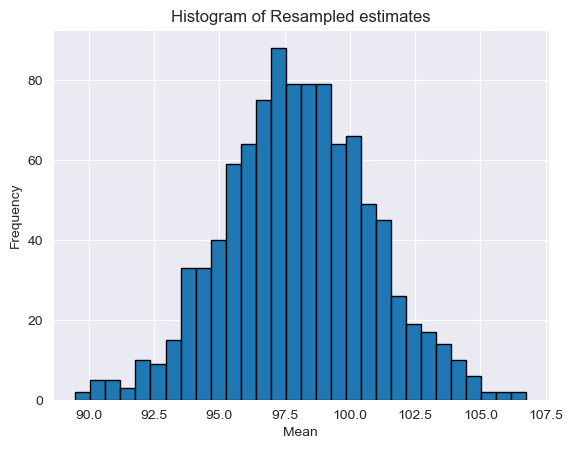

In [101]:

data = df1.time
N = 25
fcn = np.mean
numIter = 1000

mean_estimates1 = bootstrap(data, N, fcn, numIter)

mean_estimates1

plt.hist(mean_estimates1, bins=30, edgecolor='black')
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Resampled estimates')

# Show the plot
plt.show()

In [102]:
# Calculate the mean
g1=np.mean(mean_estimates1,axis=0)
g1

98.01572680000001

In [103]:
# Calculate the standard deviation
h1=np.std(mean_estimates1,axis=0)
h1

2.8144078057455992

### Question 4 (8pt)
Call your bootstrap function again as in question 3, this time increasing the sample size first to 50, and then to 100. Which of the values (mean, standard deviation) of the means distribution changes most and why? 

In [104]:
data = df1.time
N = 50
fcn = np.mean
numIter = 1000

mean_estimates2 = bootstrap(data, N, fcn, numIter)

In [105]:
g2=np.mean(mean_estimates2,axis=0)
g2

98.2003272

In [106]:
# Calculate the standard deviation
h2=np.std(mean_estimates2,axis=0)
h2

1.945274108248028

In [107]:
data = df1.time
N = 100
fcn = np.mean
numIter = 1000

mean_estimates3 = bootstrap(data, N, fcn, numIter)

In [108]:
g3=np.mean(mean_estimates3,axis=0)
g3

98.25264250000001

In [109]:
h3=np.std(mean_estimates3,axis=0)
h3

1.4457207099795417

Standard deviation changes the most as the data get more and more accurate when we take a bigger sample.

### Question 5 (6pt)
Calculate the predicted standard error of the mean from the population standard deviation and the same size for  N=25, N=50, and N=100. Write a line of code for each sample size that prints the answer in a full sentence. Written answer: Do these match up with the SEMs that you got from question 4? 

In [110]:
# For N=25
def standardError(N):
    if N == 25:
        SEM = h1 / np.sqrt(N)
        print("For N=25, the predicted SEM is", SEM)
    if N == 50:
        SEM = h2 / np.sqrt(N)
        print("For N=50, the predicted SEM is", SEM)
    if N == 100:
        SEM = h3 / np.sqrt(N)
        print("For N=100, the predicted SEM is", SEM)

standardError(25)
standardError(50)
standardError(100)



For N=25, the predicted SEM is 0.5628815611491198
For N=50, the predicted SEM is 0.2751033026417589
For N=100, the predicted SEM is 0.14457207099795416


## Task 3: Calculating confidence intervals (24pt) 
### Question 1 (8pt)
Write a function (confidenceInt) that constructs a confidence interval from a bootstrap sample using the percentile bootstrap method (see lecture). 	

Input arguments 
- data: Sample of estimates – usually this is output from “bootstrap” (resample function from task 3 Q2)
- prec: What Confidence interval in percent? 95= 95% confidence interval <br/>
Output argument: 
- A list with 2 values: the lower and upper bound of the interval. 

Tip: Use np.percentile to get a specific percentile of the data. The lower bound of a 95% confidence interval is the (100-95)/2=2.5 percentile. 

In [111]:
def confidenceInt(data, prec):
    lower_bound = np.percentile(data, (100 - prec) / 2)
    upper_bound = np.percentile(data, 100 - (100 - prec) / 2)
    return [lower_bound, upper_bound]

### Question 2 (8pt)
Determine the confidence 95% interval for the mean estimate of your sample of 25. Use your bootstrap function (resample from Task 3 Q2) above to generate 1000 artificial samples of 25. Then use your confidenceInt function to get the 95% confidence interval.  Report the interval. 


In [112]:

t=confidenceInt(df1.time,95)
print(t)

data = df1.time
N = 25
fcn = np.mean
numIter = 1000

mean_estimates7 = bootstrap(data, N, fcn, numIter)

t7=confidenceInt(mean_estimates7,95)

print(t7)
print("is the interval")

[76.498, 124.74199999999998]
[92.84073000000001, 103.92254]
is the interval


### Question 3  (8pt)
Repeat the plotting of the histogram from task 2.3 – but this time plot the lower and upper bound of the confidence interval as a vertical line – see plt.axvline. Make sure that the graph has x- and y-labels and a caption.

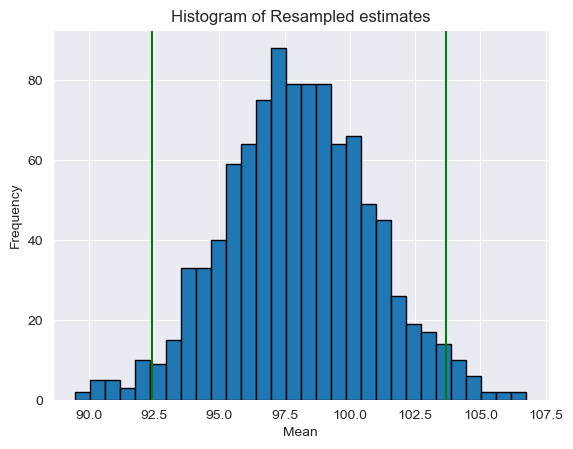

In [113]:
plt.hist(mean_estimates1, bins=30, edgecolor='black')
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Resampled estimates')
t=confidenceInt(mean_estimates1,95)
# Add the lower and upper bounds of the confidence interval
plt.axvline(t[0], color='green', label='Lower CI Bound')
plt.axvline(t[1], color='green', label='Upper CI Bound')

## Task 4: Bootstraping from the sample (22pt)
Now let's forget that you ever had the data from the whole population. Say, you only have your initial sample of 25 participants. How would you get an estimate of the confidence interval of the mean of the sample? 
### Question 1 (8pt)
Load the sample stored in run10sample.csv. Now call the resample function with that time data, in each loop resampling 25 data points from 25 data points (with replacement!). You have now taken 1000 bootstrap samples. Report the mean of the bootstrap samples, the standard deviation of the the samples, and the 95% confidence interval.

In [114]:
# Load the sample data
data5=df1.time

# Perform the bootstrap resampling
n_samples = 1000
bootstrapped_samples = np.random.choice(data5, (n_samples, 25), replace=True)

# Calculate the mean of the bootstrap samples
bootstrapped_means = np.mean(bootstrapped_samples, axis=1)

# Calculate the standard deviation of the bootstrap samples
bootstrapped_stds = np.std(bootstrapped_samples, axis=1)

# Calculate the 95% confidence interval
ci = np.percentile(bootstrapped_means, [2.5, 97.5])

# Print the results
print("Mean of bootstrap samples: ", np.mean(bootstrapped_means))
print("Standard deviation of bootstrap samples: ", np.mean(bootstrapped_stds))
print("95% Confidence Interval: ", ci)


Mean of bootstrap samples:  98.0780376
Standard deviation of bootstrap samples:  13.443011672792698
95% Confidence Interval:  [ 93.23501 103.42606]


### Question 2 (8pt)
Plot of the histogram of your bootstrap samples –plot the lower and upper bound of the confidence interval as a vertical line – see plt.axvline (see homework 3). Plot the true population mean (Task 2.1) as a red vertical line. Make sure that the graph has x- and y-labels and caption saying what the different lines mean. 

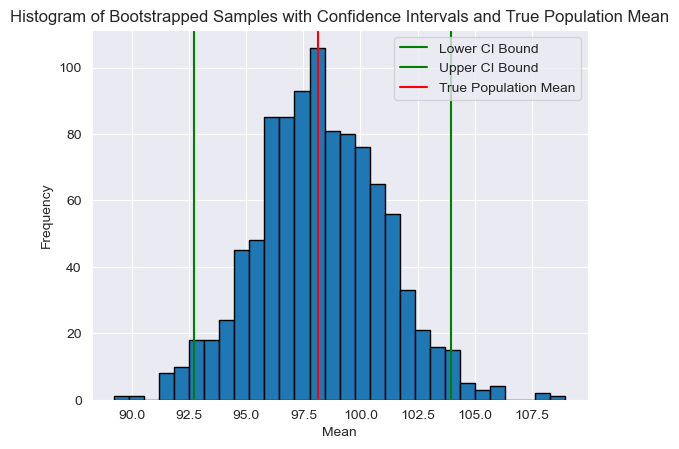

In [115]:
# Perform the bootstrap resampling
n_samples = 1000
bootstrapped_samples = np.random.choice(data5, (n_samples, 25), replace=True)

# Calculate the mean of the bootstrap samples
bootstrapped_means = np.mean(bootstrapped_samples, axis=1)

# Calculate the 95% confidence interval
ci = np.percentile(bootstrapped_means, [2.5, 97.5])

# Plot the histogram of the bootstrap samples
plt.hist(bootstrapped_means, bins=30, edgecolor='black')

# Add the lower and upper bounds of the confidence interval
plt.axvline(ci[0], color='green', label='Lower CI Bound')
plt.axvline(ci[1], color='green', label='Upper CI Bound')

# Add the true population mean
plt.axvline(np.mean(data), color='red', label='True Population Mean')

# Add labels and title
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Bootstrapped Samples with Confidence Intervals and True Population Mean')
plt.legend()

# Show the plot
plt.show()


### Question 3: (6pt)
Written answer: Does the 95% confidence interval include the true population mean? Does it include the mean value from last year’s cherry blossom run (101min)? Is there statistical evidence from your sample of N=25, that the race times have gotten faster from last year? 

Yes, the confidence interval includes the true population mean here.
Yes, it contains last year's cherry blossom run(101 min.) as it contains all the samples between 92.939 and 103.456.
No, because we don't have data from last year and know nothing about it.